In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px ### for plotting the data on world map

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/01-01-2021.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3977 entries, 0 to 3976
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3263 non-null   float64
 1   Admin2               3268 non-null   object 
 2   Province_State       3807 non-null   object 
 3   Country_Region       3977 non-null   object 
 4   Last_Update          3977 non-null   object 
 5   Lat                  3891 non-null   float64
 6   Long_                3891 non-null   float64
 7   Confirmed            3977 non-null   int64  
 8   Deaths               3977 non-null   int64  
 9   Recovered            3977 non-null   int64  
 10  Active               3976 non-null   float64
 11  Combined_Key         3977 non-null   object 
 12  Incident_Rate        3890 non-null   float64
 13  Case_Fatality_Ratio  3935 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 435.1+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incident_Rate,Case_Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2021-01-02 05:22:33,33.93911,67.709953,51526,2191,41727,0.0,Afghanistan,0.000000,4.252222
1,NaN,NaN,NaN,Albania,2021-01-02 05:22:33,41.15330,20.168300,58316,1181,33634,23501.0,Albania,2026.409062,2.025173
2,NaN,NaN,NaN,Algeria,2021-01-02 05:22:33,28.03390,1.659600,99897,2762,67395,29740.0,Algeria,227.809861,2.764848
3,NaN,NaN,NaN,Andorra,2021-01-02 05:22:33,42.50630,1.521800,8117,84,7463,570.0,Andorra,10505.403482,1.034865
4,NaN,NaN,NaN,Angola,2021-01-02 05:22:33,-11.20270,17.873900,17568,405,11146,6017.0,Angola,53.452981,2.305328


In [3]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incident_Rate,Case_Fatality_Ratio
0,Afghanistan,33.93911,67.709953,51526,2191,41727,0.0,0.000000,4.252222
1,Albania,41.15330,20.168300,58316,1181,33634,23501.0,2026.409062,2.025173
2,Algeria,28.03390,1.659600,99897,2762,67395,29740.0,227.809861,2.764848
3,Andorra,42.50630,1.521800,8117,84,7463,570.0,10505.403482,1.034865
4,Angola,-11.20270,17.873900,17568,405,11146,6017.0,53.452981,2.305328


In [4]:
### group the data by country

world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()

<ipython-input-4-96ee5ed8b016>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()


,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,51526,0.0,41727,2191
1,Albania,58316,23501.0,33634,1181
2,Algeria,99897,29740.0,67395,2762
3,Andorra,8117,570.0,7463,84
4,Angola,17568,6017.0,11146,405


/home/manishbarnwal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


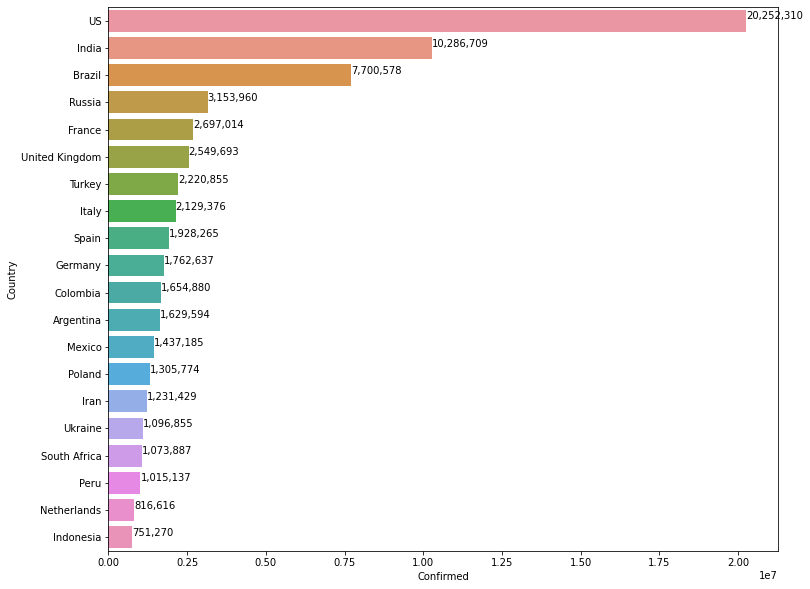

In [5]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)
### Generate a Barplot
plt.figure(figsize=(12,10))
plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
  plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

/home/manishbarnwal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/manishbarnwal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


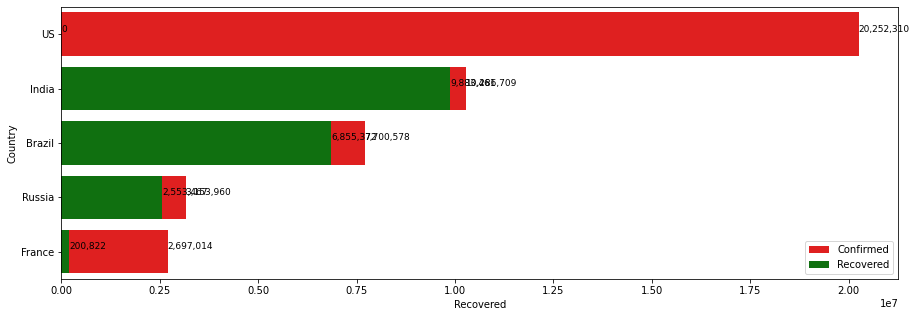

In [6]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

### Generate a Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country'], color = 'green', label='Recovered')

### Adding Texts for barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
  confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
  recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

In [7]:
figure = px.choropleth(world,locations='Country', locationmode='country names', color='Confirmed', hover_name='Country', color_continuous_scale='tealgrn', range_color=[1,1000000],title='Countries with Confirmed cases')
figure.show()